In [29]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Carregando os dados
df = pd.read_excel("/Users/fabicampanari/Desktop/project_5-Discriminant Analyze/Biscobis.xlsx")

In [31]:
# Estatísticas gerais
print("Estatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,3.515000,2.364000,7.894000,5.258000,2.913000,2.665000,6.957000,2.000000,46.10000
std,1.320726,1.195659,1.386502,1.130047,0.750307,0.770855,1.590645,0.828775,8.98877
min,0.000000,0.200000,5.000000,2.500000,0.700000,1.100000,3.700000,1.000000,25.00000
25%,2.500000,1.475000,6.700000,4.575000,2.400000,2.200000,5.800000,1.000000,39.00000
50%,3.400000,2.150000,8.050000,5.000000,3.000000,2.600000,7.150000,2.000000,46.50000
75%,4.600000,3.225000,9.100000,6.000000,3.425000,3.000000,8.325000,3.000000,53.25000
max,6.100000,5.400000,10.000000,8.200000,4.600000,4.600000,10.000000,3.000000,65.00000


In [32]:
# Verificando valores ausentes
print("Missing values:\n", df.isnull().sum())

Missing values:
 x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
x9    0
dtype: int64


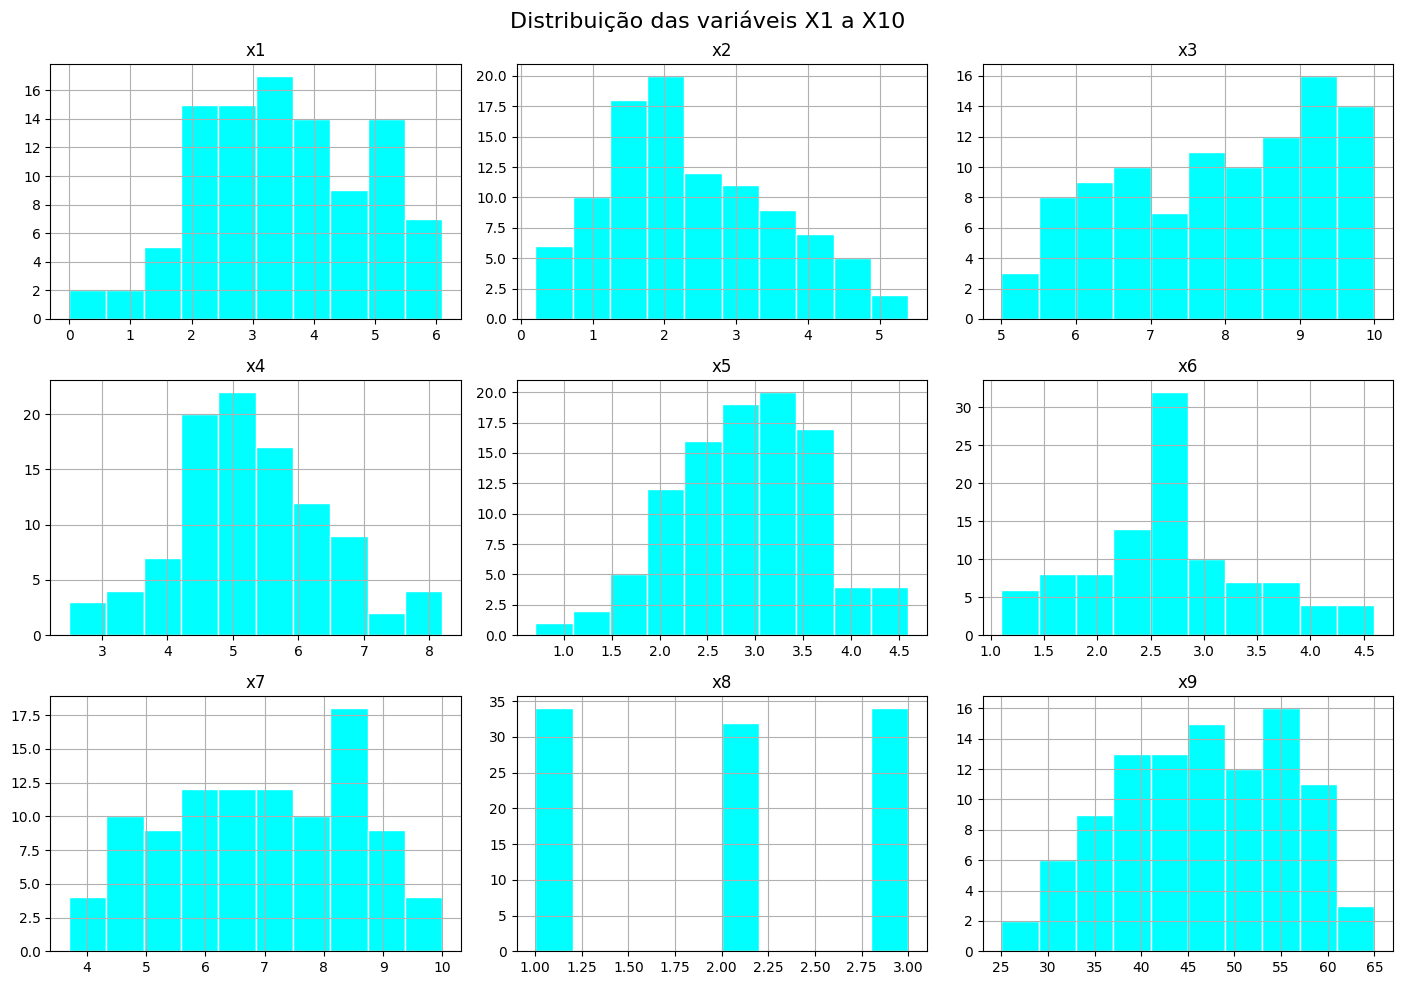

In [33]:
# Histograma das variaveis 
df[[f"x{i}" for i in range(1, 10)]].hist(bins=10, figsize=(14, 10), color="cyan", edgecolor="white")
plt.suptitle("Distribuição das variáveis X1 a X10", fontsize=16)
plt.tight_layout()
plt.show()

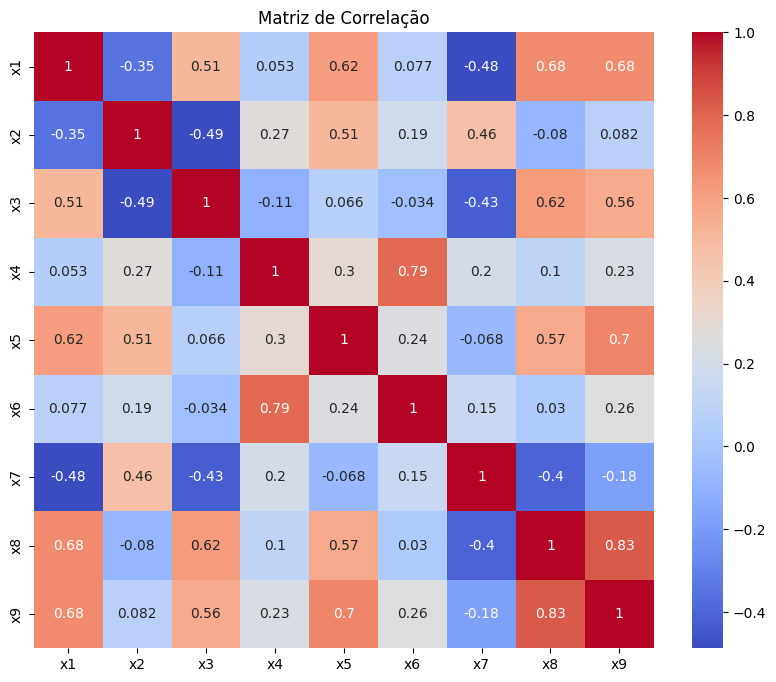

In [34]:
# Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [35]:
# Análise Discriminante Linear (LDA) para prever X11
# Variáveis preditoras e alvo
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]

# Criando a variável alvo 'x11' como exemplo (substitua com a lógica correta, se necessário)
# Aqui, 'x11' é derivado como a soma de 'x8' e 'x9' apenas como exemplo
df['x11'] = df['x8'] + df['x9']
y = df['x11']


In [36]:
# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
# LDA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [38]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)


In [39]:
# Avaliação
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

In [40]:
# Visualização das classes no espaço discriminante
X_lda = lda.transform(X_scaled)

# Selecionando apenas os dois primeiros componentes (LD1 e LD2)
lda_df = pd.DataFrame(data=X_lda[:, :2], columns=['LD1', 'LD2'])

# Adicionando a classe ao DataFrame
lda_df['Classe'] = y.values

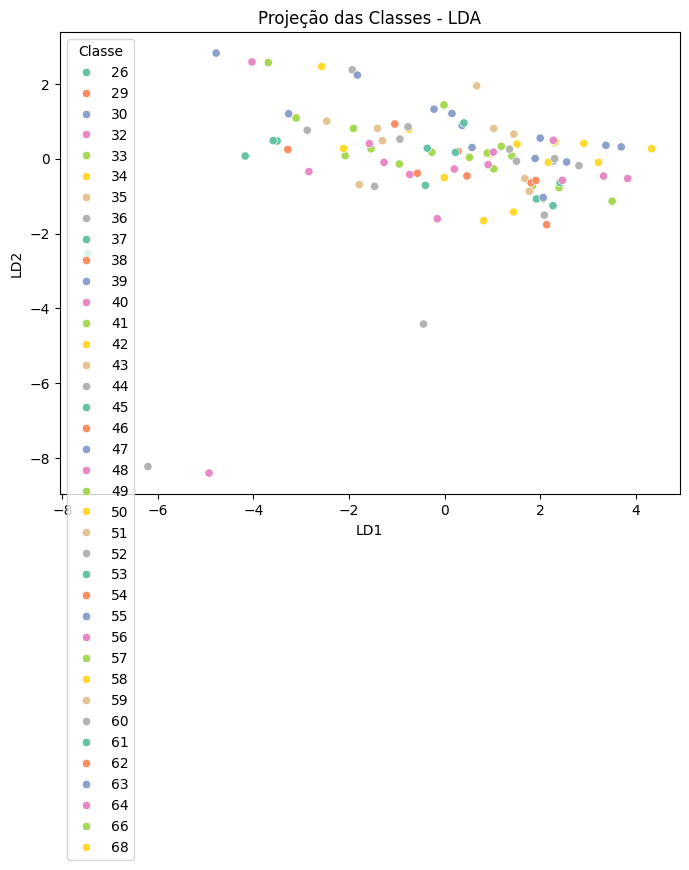

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='LD1', y='LD2', hue='Classe', data=lda_df, palette="Set2")
plt.title("Projeção das Classes - LDA")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


In [42]:
# Regressão para prever x9 (nível de uso)
# Prevendo x9 com as variáveis explicativas
X_reg = df[[f"x{i}" for i in range(1, 10)]]  # Adjusted to include only existing columns
y_reg = df["x9"]


In [43]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


In [47]:
reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

In [45]:
# Avaliação do modelo
print("Erro Médio Quadrático:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

Erro Médio Quadrático: 7.741355016568863e-29
R² Score: 1.0


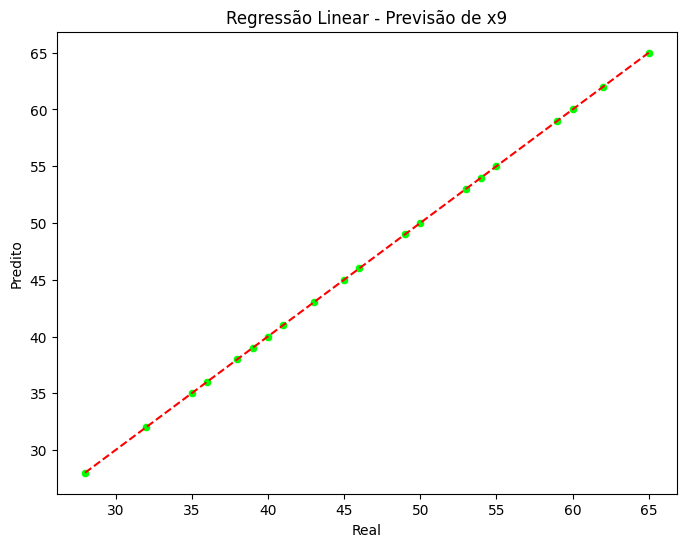

In [46]:
# Gráfico real vs predito
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_r, y=y_pred_r, color="lime", edgecolor="white")
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], '--', color="red")
plt.xlabel("Real")
plt.ylabel("Predito")
plt.title("Regressão Linear - Previsão de x9")
plt.show()
